# ***Importing the Libraries***

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [ ]:
base_url = 'https://www.eurotechjobs.com/jobs/data_science'

# ***Extracting the job urls from the website***

In [ ]:
from urllib.parse import urljoin
def extract_job_urls(base_url, limit = 30):
  job_urls=[]
  response = requests.get(base_url)
  soup = BeautifulSoup(response.text,"html.parser")
  job_links = soup.select("h3 a")
  for job_link in job_links[:limit]:
    job_url = job_link.get("href")
    complete_job_url = urljoin(base_url, job_url)
    job_urls.append(complete_job_url)
  print(job_urls)
  return job_urls
base_url = 'https://www.eurotechjobs.com/jobs/data_science'
job_urls = extract_job_urls(base_url, limit = 30)


['https://www.eurotechjobs.com/job_display/249904/Head_of_Data_Science_Ad_Tech_Delivery_Hero_Berlin', 'https://www.eurotechjobs.com/job_display/250327/Deputy_Chief_Data_Scientist_EPFL_Swiss_Federal_Institute_of_Technology_Lausanne_Lausanne', 'https://www.eurotechjobs.com/job_display/250257/Senior_Software_Engineer_Explore_Zendesk_Krakow_or_Remote', 'https://www.eurotechjobs.com/job_display/250027/Data_Scientist_L5_Promotional_Media_EMEA_Netflix_Amsterdam', 'https://www.eurotechjobs.com/job_display/250015/Software_Developer_for_Data_Automation_ESRF_European_Synchrotron_Radiation_Facility_Grenoble', 'https://www.eurotechjobs.com/job_display/249888/Senior_Computer_Vision_Engineer_Technology_Development_Group_Apple_Stockholm', 'https://www.eurotechjobs.com/job_display/249810/Principal_AI_ML_Engineer_Cisco_Systems_Paris', 'https://www.eurotechjobs.com/job_display/249724/Senior_Cloud_Engineer_m_f_d_Terma_Darmstadt', 'https://www.eurotechjobs.com/job_display/249105/Application_Data_Engineer_A

In [ ]:
def extract_text_elements(soup):
  text_elements = soup.find_all(text = True)
  return[element.strip() for element in text_elements if element.strip()]

# ***Extracting the Skills from the job postings***

In [ ]:
def skills_and_description(text_elements):
  skills=[]
  for element in text_elements:
    if "strong" in element.lower() and "skills" in element.lower():
      skills.extend(element.split(";"))
  return skills

# ***Extracting the job details from the job postings***

In [ ]:
def scrape_job_details(base_url, job_url):
  complete_job_url = urljoin(base_url, job_url)
  response = requests.get(complete_job_url)
  soup = BeautifulSoup(response.text,"html.parser")
  text_elements = extract_text_elements(soup)
  skills = skills_and_description(text_elements)


  title_element = soup.find('h2', style='text-align: center;')
  title = title_element.text.strip() if title_element else 'N/A'

  company_element = title_element.find_next('h2', style='text-align: center;')
  company = company_element.text.strip() if company_element else 'N/A'

  location_element = company_element.find_next('h2', style='text-align: center;')
  location = location_element.text.strip() if location_element else 'N/A'

  job_details = {
    "Job Position" : title,
    "Company": company,
    "Location": location,
    "Skills required": skills,
    "Link": complete_job_url
}
  return job_details
base_url = 'https://www.eurotechjobs.com/jobs/data_science'
job_urls = extract_job_urls(base_url, limit=30)
job_data_list = []
for job_url in job_urls:
  job_data  = scrape_job_details(base_url, job_url)
  job_data_list.append(job_data)
job_df = pd.DataFrame(job_data_list)
job_df = job_df[job_df["Skills required"].apply(lambda x: len(x)>0)]
job_df = job_df.reset_index(drop = True)
job_df.head(30)

['https://www.eurotechjobs.com/job_display/249904/Head_of_Data_Science_Ad_Tech_Delivery_Hero_Berlin', 'https://www.eurotechjobs.com/job_display/250327/Deputy_Chief_Data_Scientist_EPFL_Swiss_Federal_Institute_of_Technology_Lausanne_Lausanne', 'https://www.eurotechjobs.com/job_display/250257/Senior_Software_Engineer_Explore_Zendesk_Krakow_or_Remote', 'https://www.eurotechjobs.com/job_display/250027/Data_Scientist_L5_Promotional_Media_EMEA_Netflix_Amsterdam', 'https://www.eurotechjobs.com/job_display/250015/Software_Developer_for_Data_Automation_ESRF_European_Synchrotron_Radiation_Facility_Grenoble', 'https://www.eurotechjobs.com/job_display/249888/Senior_Computer_Vision_Engineer_Technology_Development_Group_Apple_Stockholm', 'https://www.eurotechjobs.com/job_display/249810/Principal_AI_ML_Engineer_Cisco_Systems_Paris', 'https://www.eurotechjobs.com/job_display/249724/Senior_Cloud_Engineer_m_f_d_Terma_Darmstadt', 'https://www.eurotechjobs.com/job_display/249105/Application_Data_Engineer_A

<ipython-input-4-77657c709194>:2: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  text_elements = soup.find_all(text = True)


,Job Position,Company,Location,Skills required,Link
0,Data Scientist (L5) - Promotional Media - EMEA,Netflix,"Amsterdam, Netherlands","[Strong SQL skills, , Strong Quantitative Prog...",https://www.eurotechjobs.com/job_display/25002...
1,Principal AI/ML Engineer,Cisco Systems,"Paris, France",[Strong problem-solving skills and ability to ...,https://www.eurotechjobs.com/job_display/24981...
2,Application Data Engineer,Advanzia Bank,"Munsbach, Luxembourg","[Strong analytical skills, Strong communicatio...",https://www.eurotechjobs.com/job_display/24910...
3,Artificial Intelligence Engineer,ADI - Analog Devices,"Limerick, Ireland",[As an Artificial Intelligence Engineer at Ana...,https://www.eurotechjobs.com/job_display/24901...
4,Business Intelligence Analyst,skeyes,"Steenokkerzeel, Belgium",[Analytical and Quantitative Skills: Strong sk...,https://www.eurotechjobs.com/job_display/25016...
5,Software Engineer,Cognex,"Fribourg, Switzerland","[Strong programming skills, professional progr...",https://www.eurotechjobs.com/job_display/24968...
6,Full Stack Data Scientist,Schibsted Tech Polska,"Krakow, Poland",[We are seeking a strong regular or early seni...,https://www.eurotechjobs.com/job_display/24960...
7,Technical Lead - Computer Vision - Body Techno...,Apple,"Munich, Germany","[Strong communication, technical planning and ...",https://www.eurotechjobs.com/job_display/24959...
8,Data Engineer,DIGITALL,"Sofia, Bulgaria",[Knowledge of Python or R is required.Strong d...,https://www.eurotechjobs.com/job_display/24924...
9,Data Analyst,WallexLab,"Sofia, Bulgaria",[Strong analytical skills with the ability to ...,https://www.eurotechjobs.com/job_display/24878...


# ***Distribution of job locations across Europe***

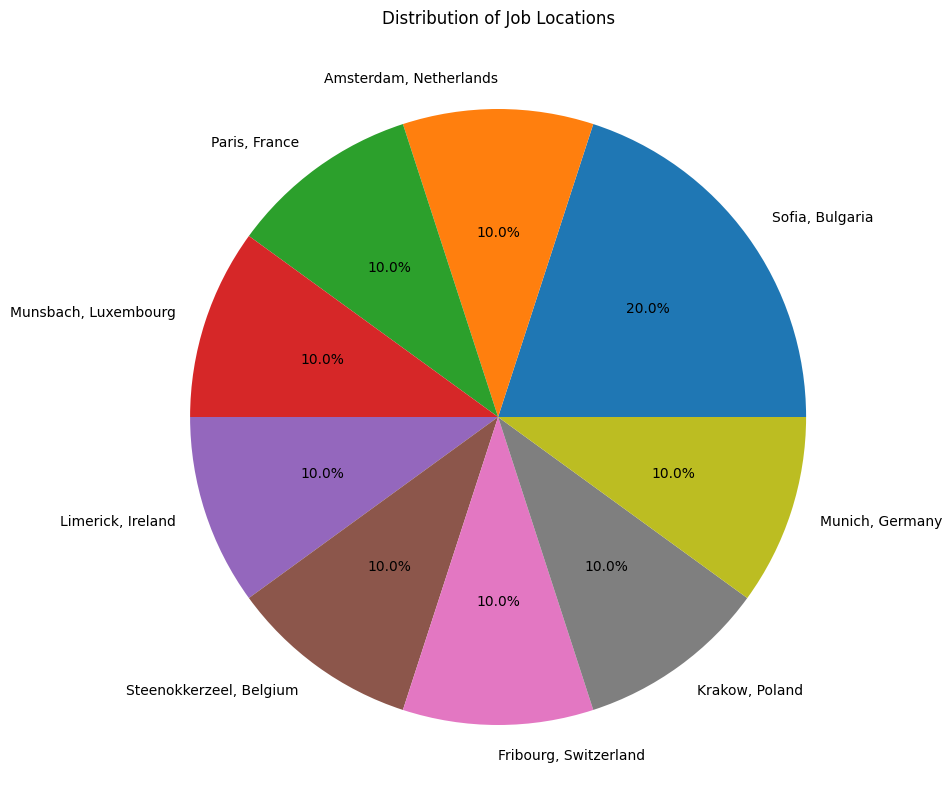

In [ ]:
import matplotlib.pyplot as plt

# Count the frequency of each location
location_count = job_df['Location'].value_counts()

# Create a pie chart
location_count.plot(kind='pie', autopct='%1.1f%%', figsize=(12, 10))
plt.title('Distribution of Job Locations')
plt.ylabel('')
plt.show()


# ***Creating word cloud for skills***

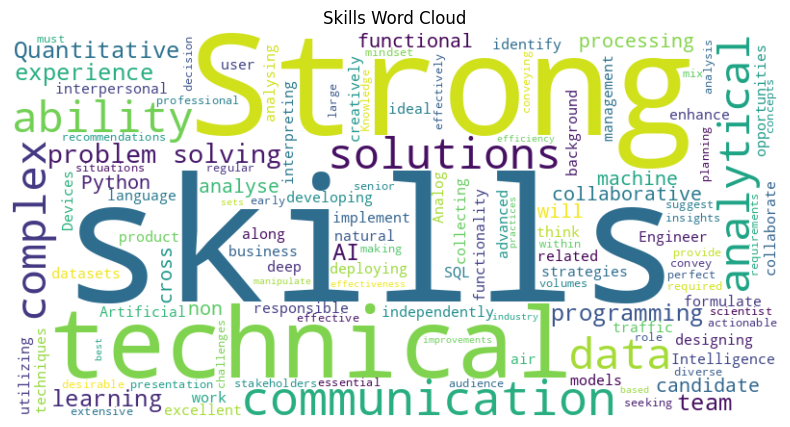

In [ ]:
from itertools import chain

# Convert lists in 'Skills required' column to strings
job_df['Skills_str'] = job_df['Skills required'].apply(lambda x: ', '.join(str(skill) for skill in x))


# Flatten the nested lists in the 'Skills_str' column
all_skills = ' '.join(job_df['Skills_str'])
from wordcloud import WordCloud
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_skills)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Skills Word Cloud')
plt.show()


In [ ]:
import plotly.express as px

def radar_chart(df, skills):
    fig = px.line_polar(df, r=skills, theta=skills, line_close=True, title="Radar Chart of Skills")
    fig.update_traces(fill='toself')
    fig.show()

# Assuming your DataFrame has columns 'Skills required' and 'Location' (change as needed)
filtered_df['Skills'] = filtered_df['Skills required'].apply(lambda x: len(x))
radar_chart(filtered_df, skills=selected_skills)



In [ ]:
from geopy.geocoders import Nominatim

def get_lat_long_from_location(df, location_column):
    geolocator = Nominatim(user_agent="your_app_name")

    latitudes = []
    longitudes = []

    for location in job_df[location_column]:
        try:
            location_info = geolocator.geocode(location)
            if location_info:
                latitudes.append(location_info.latitude)
                longitudes.append(location_info.longitude)
            else:
                latitudes.append(None)
                longitudes.append(None)
        except Exception as e:
            print(f"Error geocoding location {location}: {e}")
            latitudes.append(None)
            longitudes.append(None)

    return latitudes, longitudes

# Example usage
job_df['Latitude'], job_df['Longitude'] = get_lat_long_from_location(job_df, 'Location')


In [ ]:
import folium
from folium.plugins import MarkerCluster

def display_map(df, location_column):
    # Create a base map centered at an initial location
    map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
    mymap = folium.Map(location=map_center, zoom_start=5)

    # Create a MarkerCluster layer for better visualization of multiple markers
    marker_cluster = MarkerCluster().add_to(mymap)

    # Add markers for each job location
    for index, row in df.iterrows():
        folium.Marker([row['Latitude'], row['Longitude']], popup=row[location_column]).add_to(marker_cluster)

    # Display the map in the notebook
    display(mymap)

# Example usage for job_df
display_map(job_df, 'Location')

